# Simplex Example
Run the example provided in the [README](https://github.com/vanderschaarlab/Simplex/tree/main#toy-example) of the simplex repo.

In [1]:
from simplexai.explainers.simplex import Simplex
from simplexai.models.image_recognition import MnistClassifier

from xai.data_handlers.mnist import load_mnist

In [2]:
# Get a model
model = MnistClassifier() # Model should have the BlackBox interface

In [3]:
model

MnistClassifier(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

In [4]:
type(model)

simplexai.models.image_recognition.MnistClassifier

In [5]:
# Load corpus and test inputs
corpus_loader = load_mnist(subset_size=100, train=True, batch_size=100) # MNIST train loader
test_loader = load_mnist(subset_size=10, train=True, batch_size=10) # MNIST test loader
corpus_inputs, _ = next(iter(corpus_loader)) # A tensor of corpus inputs
test_inputs, _ = next(iter(test_loader)) # A set of inputs to explain

In [6]:
load_mnist?

Signature:
load_mnist(
    batch_size: int,
    train: bool,
    subset_size=None,
    shuffle: bool = True,
    data_dir=PosixPath('/home/gurp/workspace/xai/xai/data'),
) -> torch.utils.data.dataloader.DataLoader
Docstring:
Parameters
----------
batch_size: int
    Number of samples per batch to load.
train: bool
    Whether to create the dataset using the training image set `train-images-idx3-ubyte` or
    the test set `t10k-images-idx3-ubyte`.
subset_size: int, optional
    If set, this extracts a subset of a given size rather than the full data set.
    Defaults to None, which loads the entire data set.
shuffle: bool, optional
    Whether to reshuffle the data at every epoch.
data_dir: path-like, optional
    The directory to download files to.
    This defaults to the `data` subdirectory of the xai project.

Returns
-------
DataLoader
    A DataLoader containing MNIST image data.

See Also
--------
Adapted from https://github.com/vanderschaarlab/Simplex/blob/0af504927122d59dfc1378

In [7]:
corpus_loader

In [8]:
test_loader

In [9]:
corpus_inputs.shape

torch.Size([100, 1, 28, 28])

In [10]:
test_inputs.shape

torch.Size([10, 1, 28, 28])

In [11]:
# Compute the corpus and test latent representations
corpus_latents = model.latent_representation(corpus_inputs).detach()
test_latents = model.latent_representation(test_inputs).detach()

In [12]:
corpus_latents

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.1309, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 1.0603, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.2202, 0.6056, 0.0000],
        ...,
        [0.8280, 0.2758, 0.0000,  ..., 0.0000, 0.0000, 0.4622],
        [0.0000, 0.6300, 0.0000,  ..., 0.0000, 1.9363, 0.0000],
        [0.0000, 0.4484, 0.0000,  ..., 0.0000, 0.5570, 0.0000]])

In [13]:
corpus_latents.shape

torch.Size([100, 50])

In [14]:
test_latents.shape

torch.Size([10, 50])

In [15]:
# Initialize SimplEX, fit it on test examples
simplex = Simplex(corpus_examples=corpus_inputs,
                  corpus_latent_reps=corpus_latents)
simplex.fit(test_examples=test_inputs,
            test_latent_reps=test_latents,
            reg_factor=0)


Weight Fitting Epoch: 2000/10000 ; Error: 29.2 ; Regulator: 6.09 ; Reg Factor: 0
Weight Fitting Epoch: 4000/10000 ; Error: 24.6 ; Regulator: 2.82 ; Reg Factor: 0
Weight Fitting Epoch: 6000/10000 ; Error: 24 ; Regulator: 2.36 ; Reg Factor: 0
Weight Fitting Epoch: 8000/10000 ; Error: 23.9 ; Regulator: 2.26 ; Reg Factor: 0
Weight Fitting Epoch: 10000/10000 ; Error: 23.8 ; Regulator: 2.23 ; Reg Factor: 0


In [16]:
simplex?

Type:           Simplex
String form:    <simplexai.explainers.simplex.Simplex object at 0x7f370248a310>
File:           ~/anaconda3/envs/xai/lib/python3.11/site-packages/simplexai/explainers/simplex.py
Docstring:      <no docstring>
Init docstring:
Initialize a SimplEx explainer
:param corpus_examples: corpus input features
:param corpus_latent_reps: corpus latent representations

These weights are example-importance weights.

weights[i,c] = weight of corpus example c in the decomposition of example i.

In [17]:
# Get the weights of each corpus decomposition
weights = simplex.weights

In [18]:
weights

tensor([[6.0338e-05, 1.1318e-05, 1.4405e-05, 2.2468e-05, 2.1109e-05, 1.0474e-05,
         1.4068e-05, 2.5688e-02, 1.2314e-05, 1.2855e-05, 6.8131e-03, 1.6601e-05,
         1.3384e-05, 4.9653e-02, 3.7094e-05, 3.8251e-02, 2.9288e-05, 1.7426e-05,
         1.3150e-05, 8.4622e-05, 1.1257e-05, 1.5401e-05, 1.2137e-05, 4.4986e-03,
         1.9471e-05, 2.0108e-05, 1.5541e-05, 7.1557e-06, 1.7085e-05, 1.6321e-01,
         1.3667e-05, 1.9666e-05, 6.4548e-05, 1.6139e-05, 3.8158e-05, 1.5386e-05,
         1.8032e-05, 1.6975e-05, 2.1231e-05, 1.7361e-05, 1.4837e-05, 1.9418e-05,
         1.4267e-05, 1.3150e-04, 1.7476e-05, 1.5157e-05, 1.1193e-05, 1.6360e-05,
         1.5542e-05, 1.9641e-05, 1.0633e-05, 1.0928e-05, 1.8552e-05, 2.9208e-05,
         1.1666e-05, 7.1535e-06, 1.1878e-05, 9.3584e-06, 8.6327e-06, 1.1689e-05,
         6.0640e-05, 1.5050e-05, 1.9279e-05, 1.5929e-05, 8.7190e-06, 7.9614e-06,
         7.7012e-06, 1.5494e-05, 8.3546e-06, 1.3353e-05, 1.6502e-05, 1.2466e-05,
         1.3675e-05, 8.0218e

In [19]:
weights.shape

torch.Size([10, 100])

Feature-importance. Compute jacobians, where the projection of each feature gives the inmportance of that feature in explaining the given test example.

In [20]:
import torch

In [21]:
# Compute the Integrated Jacobian for a particular example
i = 4
input_baseline = torch.zeros(corpus_inputs.shape) # Baseline tensor of the same shape as corpus_inputs

In [22]:
simplex.jacobian_projection(test_id=i, model=model, input_baseline=input_baseline)

tensor([[[[ 4.7003e-05, -2.2705e-05, -4.2400e-06,  ..., -2.3176e-05,
           -2.2900e-05, -0.0000e+00],
          [-1.5041e-05,  1.3769e-05, -1.7323e-04,  ..., -1.9139e-05,
            1.2207e-05, -0.0000e+00],
          [ 1.8773e-05,  2.1183e-04,  2.7667e-04,  ..., -1.5716e-04,
            4.0451e-04, -0.0000e+00],
          ...,
          [ 8.5326e-05,  2.5790e-05,  1.3403e-04,  ..., -3.3032e-05,
           -3.5749e-05, -0.0000e+00],
          [ 9.4613e-05, -1.7785e-05, -1.7932e-04,  ...,  4.6016e-05,
            6.1111e-06, -0.0000e+00],
          [-0.0000e+00, -0.0000e+00, -0.0000e+00,  ..., -0.0000e+00,
           -0.0000e+00, -0.0000e+00]]],


        [[[ 1.0762e-04,  2.4606e-05, -4.9150e-05,  ..., -4.4215e-05,
            1.3110e-04, -0.0000e+00],
          [-1.4521e-05,  6.2528e-05, -2.4103e-04,  ...,  6.2642e-05,
            5.5093e-05, -0.0000e+00],
          [ 1.3539e-04,  1.1193e-04,  1.3926e-04,  ...,  6.0731e-05,
           -4.5903e-05, -0.0000e+00],
          ...,
   

In [23]:
result = simplex.decompose(i)

In [24]:
result  # weight, features, jacobian projections

[(0.16139263,
  tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
            -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
        

In [25]:
len(result)

100

In [26]:
[k[0] for k in result]  # weights

[0.16139263,
 0.1375007,
 0.12646663,
 0.11949237,
 0.09218459,
 0.08977385,
 0.07541382,
 0.06365691,
 0.05920287,
 0.028389713,
 0.020627204,
 0.015409183,
 0.003938056,
 0.001862027,
 0.00078543596,
 0.00065151043,
 0.00051950075,
 0.0003091527,
 0.00030149982,
 0.0002877587,
 0.00012371711,
 0.00010331762,
 6.056279e-05,
 5.892382e-05,
 5.7611793e-05,
 5.693207e-05,
 5.0932056e-05,
 4.950624e-05,
 4.885236e-05,
 4.558959e-05,
 4.0733677e-05,
 2.8119897e-05,
 2.7539712e-05,
 2.7354028e-05,
 2.5121175e-05,
 2.4916626e-05,
 2.3510092e-05,
 2.3390447e-05,
 2.1377153e-05,
 2.0680973e-05,
 2.0304864e-05,
 2.0249694e-05,
 2.0166728e-05,
 1.9789743e-05,
 1.957139e-05,
 1.941301e-05,
 1.9154317e-05,
 1.8780327e-05,
 1.8492252e-05,
 1.8474379e-05,
 1.8473285e-05,
 1.7963706e-05,
 1.7907074e-05,
 1.7818831e-05,
 1.7577577e-05,
 1.7564991e-05,
 1.7502169e-05,
 1.732448e-05,
 1.72254e-05,
 1.7156332e-05,
 1.7076021e-05,
 1.703206e-05,
 1.6950147e-05,
 1.6937302e-05,
 1.6834818e-05,
 1.6597307e-

In [27]:
result[0][1]

tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
          -0.4242, -0.4242, -0.4242, -0.4242, -0

In [28]:
result[0][1][0].shape

torch.Size([28, 28])

In [29]:
from matplotlib import pyplot as plt
from simplexai.visualization.images import plot_mnist

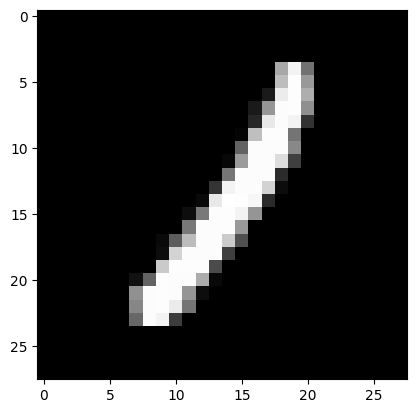

In [30]:
plt.imshow(result[0][1][0], cmap='gray')
plt.show()

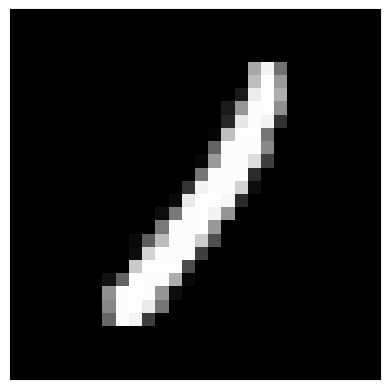

In [31]:
fig = plot_mnist(result[0][1][0])

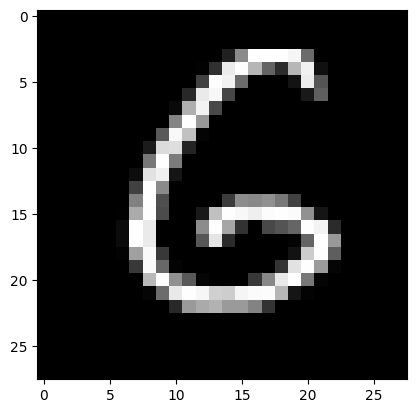

In [32]:
plt.imshow(result[1][1][0], cmap='gray')
plt.show()

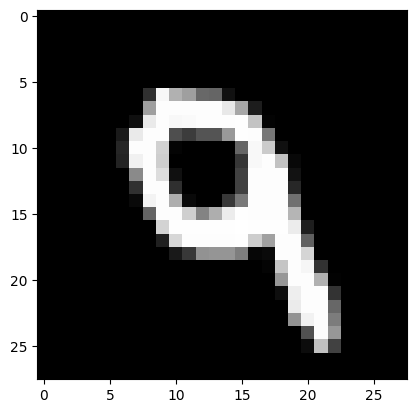

In [33]:
plt.imshow(result[2][1][0], cmap='gray')
plt.show()

In [34]:
result[0][2].shape

torch.Size([1, 28, 28])

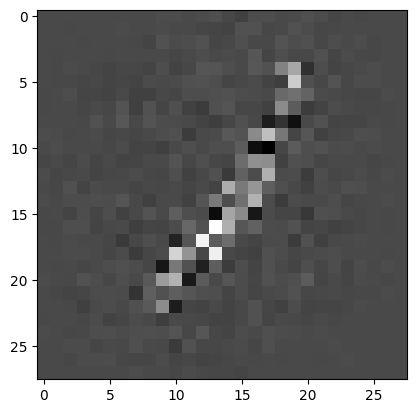

In [35]:
plt.imshow(result[0][2][0], cmap='gray')
plt.show()

In [36]:
test_inputs[i][0].shape

torch.Size([28, 28])

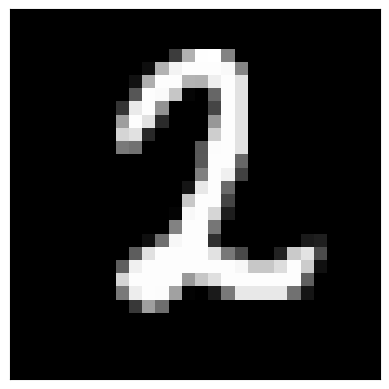

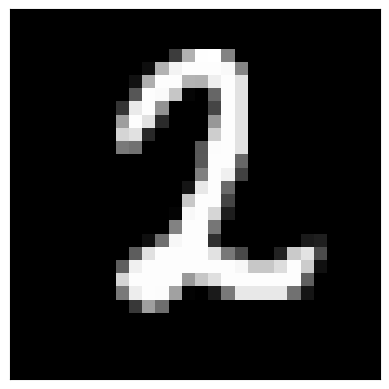

In [37]:
plot_mnist(test_inputs[i][0])

In [38]:
simplex.latent_approx()

tensor([[6.5621e-02, 3.0732e-02, 1.5291e-01, 4.6715e-01, 3.5790e-01, 3.5975e-01,
         6.5757e-03, 5.2669e-03, 7.6488e-02, 5.1873e-01, 9.8558e-03, 2.1554e-01,
         1.8227e-01, 2.0259e-01, 6.4753e-02, 2.0751e-01, 1.8283e-01, 5.1822e-02,
         3.2677e-01, 2.4593e-01, 0.0000e+00, 9.8849e-06, 6.8691e-01, 5.6071e-01,
         6.4851e-06, 4.8698e-02, 3.3210e-01, 5.4285e-01, 1.4160e-01, 1.8573e-01,
         8.7009e-02, 1.2700e-01, 1.9435e-01, 2.1303e-02, 4.3443e-04, 2.7784e-05,
         4.8857e-01, 2.7774e-01, 3.2797e-03, 1.4456e-05, 1.4544e-01, 8.3894e-02,
         1.5096e-01, 7.9086e-02, 1.2452e-01, 3.5405e-02, 5.3461e-05, 1.6351e-03,
         4.9376e-01, 2.6697e-01],
        [1.7972e-01, 1.1637e-01, 7.1982e-02, 5.4308e-01, 1.3307e-01, 1.9168e-01,
         1.5542e-01, 2.6933e-04, 1.0769e-01, 8.4908e-02, 3.8236e-01, 1.4636e-01,
         1.8628e-01, 3.8870e-02, 2.3887e-01, 6.5172e-02, 3.8067e-04, 5.1478e-01,
         6.7564e-02, 9.0820e-02, 0.0000e+00, 1.6499e-05, 4.6039e-01, 5.1948

In [39]:
simplex.latent_approx().shape

torch.Size([10, 50])

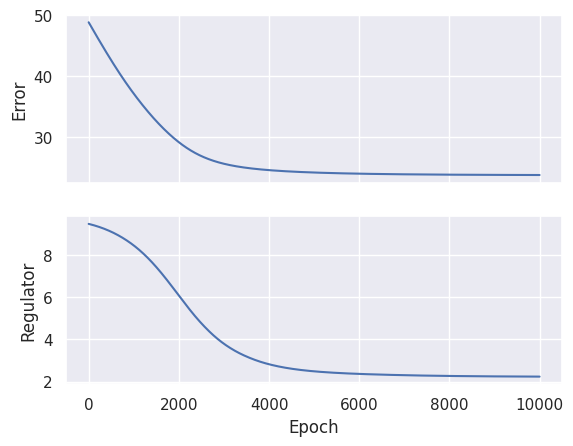

In [40]:
simplex.plot_hist()